In [1]:
#1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
#zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
#ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
#Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), 
#а за Y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
zp=np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks=np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

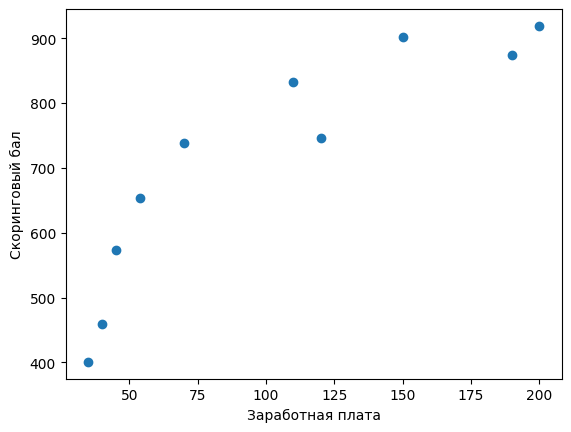

In [4]:
plt.scatter(zp,ks)
plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый бал', rotation=90)
plt.show()

In [5]:
#Предположим наличие линейной зависимомти переменных, ks = a + b * zp.

In [6]:
b=(np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b

2.620538882402765

In [7]:
a=np.mean(ks)-b*np.mean(zp)
a

444.1773573243596

In [8]:
#получаем функцию: ks = 444,18 + 2,62 * zp

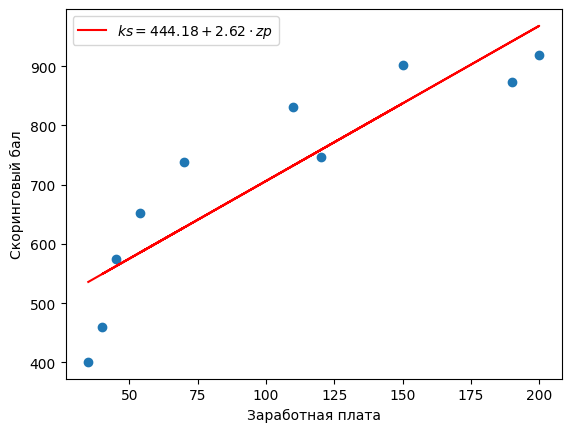

In [9]:
plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp, c='r', label=r'$ks=444.18+2.62\cdot zp$')
plt.legend()
plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый бал', rotation=90)
plt.show()

In [10]:
# наблюдаем нашу аппроксимацию

In [11]:
#Расчет коэффициентов a и b линейной регрессии с помощью матричного метода.

In [12]:
ks=ks.reshape((-1,1))
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [13]:
zp=zp.reshape((-1,1))
zp=np.hstack([np.ones((len(zp),1)),zp])
zp

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [14]:
B=np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
B

array([[444.17735732],
       [  2.62053888]])

In [15]:
# Без учета intercept

In [16]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [17]:
ks=ks.reshape((-1,1))
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [18]:
zp=zp.reshape((-1,1))
zp

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [19]:
B=np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
B

array([[5.88982042]])

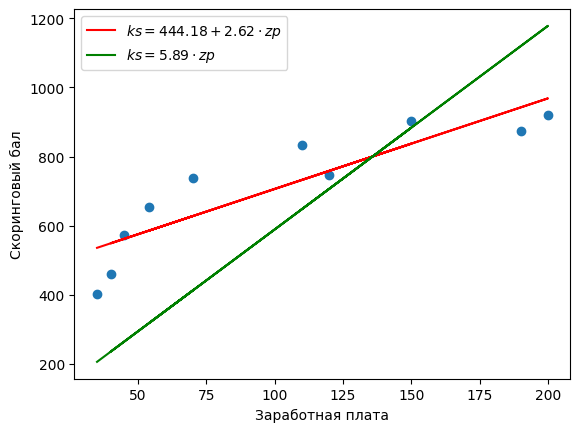

In [20]:
plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp, c='r', label=r'$ks=444.18+2.62\cdot zp$')
plt.plot(zp, B*zp, c='g', label=r'$ks=5.89\cdot zp$')
plt.legend()
plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый бал', rotation=90)
plt.show()

In [21]:
#2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [22]:
def _mse(b, x, y):
    return np.sum((b*x-y)**2)/len(x)

In [23]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [25]:
_mse(2.62, zp, ks)

203812.48504

In [26]:
#Подбираем значение коэффициента b, при MSE -> 0.
#Вычислим производную функции:

In [27]:
def _mse_p(b,x,y):
    return (2/len(x))*np.sum((b*x-y)*x)

In [28]:
alpha=1e-06

In [30]:
b=0.1
mse_min=_mse(b,zp,ks)
i_min=1
b_min=b
for i in range(10000):
    b-=alpha*_mse_p(b,zp,ks)
    if i%100==0:
        print(f'Итерация #{i}, b={b}, mse={_mse(b, zp,ks)}')
    if _mse(b,zp,ks)>mse_min:
        print(f'Итерация #{i_min}, b={b_min}, mse={mse_min}')
        break
    else:
        mse_min=_mse(b,zp,ks)
        i_min=i
        b_min=b

Итерация #0, b=0.25952808000000005, mse=493237.7212546963
Итерация #100, b=5.54537842245223, mse=58151.31823171113
Итерация #200, b=5.868748638669329, mse=56522.97550129376
Итерация #300, b=5.888531320728348, mse=56516.88130936019
Итерация #400, b=5.8897415574471985, mse=56516.85850140053
Итерация #500, b=5.889815595583751, mse=56516.858416040064
Итерация #600, b=5.889820124983314, mse=56516.85841572062
Итерация #628, b=5.889820285147628, mse=56516.85841571966


In [31]:
b_min

5.889820285147628

In [32]:
#3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
#на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [33]:
def _mse_ab(a,b, x, y):
    return np.sum(((a+b*x)-y)**2)/len(x)

In [34]:
def _mse_pa(a,b,x,y): 
    return 2*np.sum((a+b*x)-y)/len(x)

In [35]:
def _mse_pb(a,b,x,y):
    return 2*np.sum(((a+b*x)-y)*x)/len(x)

In [36]:
alpha=5e-05

In [39]:
b=0.1
a=0.1
mseab_min=_mse_ab(a,b,zp,ks)
i_min=1
b_min=b
a_min=a
   
for i in range(1000000):
    a-=alpha*_mse_pa(a,b,zp,ks)
    b-=alpha*_mse_pb(a,b,zp,ks)
    if i%50000==0:
        print(f'Итерация #{i}, a={a}, b={b}, mse={_mse_ab(a, b, zp,ks)}')
    if _mse_ab(a, b,zp,ks)>mseab_min:
        print(f'Итерация #{i_min}, a={a_min}, b={b_min}, mse={mseab_min}')
        break
    else:
        mseab_min=_mse_ab(a, b,zp,ks)
        i_min=i
        b_min=b
        a_min=a


Итерация #0, a=0.169966, b=8.07468054476, mse=122318.06397097567
Итерация #50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801
Итерация #100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364
Итерация #150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794
Итерация #200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443
Итерация #250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746
Итерация #300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141
Итерация #350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385
Итерация #400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555
Итерация #450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183
Итерация #500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699
Итерация #520164, a=444.17653163778414, b=2.62054495966686, mse=6470.414201349592


In [42]:
a_min

444.17653163778414

In [41]:
b_min

2.62054495966686

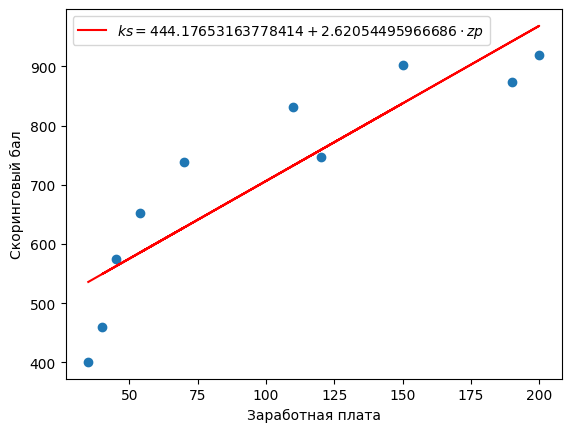

In [44]:
plt.scatter(zp,ks)
plt.plot(zp,a_min+b_min*zp, c='r', label=r'$ks=444.17653163778414+2.62054495966686\cdot zp$')
plt.legend()
plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый бал', rotation=90)
plt.show()